### Assignment No. :- 8

#### Aim :- By using multinomial Naive Bayes, RandomForest, Logistic Regression classifiers, perform news
#### classification and analysis to categorize news articles into predefined categories and extract actionable
#### insights. Use AG_news dataset

##### Name :- Tamboli Majid Samir
##### Class :- T.Y.A.I.-B
##### Batch :- B
##### Roll No. :- 2317126

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/admin1/train.csv')

In [5]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [9]:
df.isnull().sum()

Class Index    0
Title          0
Description    0
dtype: int64

In [11]:
df['Class Index'].value_counts()

Class Index
3    30000
4    30000
2    30000
1    30000
Name: count, dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(stop_words='english')
x = tfidf.fit_transform(df['Description'])
y = df['Class Index']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=42)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
modelMNB = MultinomialNB()

In [23]:
modelMNB

MultinomialNB()

In [25]:
modelMNB.fit(x_train,y_train)

MultinomialNB()

In [27]:
y_pred_MNB = modelMNB.predict(x_test)

In [29]:
y_pred_MNB

array([3, 3, 2, ..., 2, 1, 2])

In [80]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

acc_MNB = accuracy_score(y_test , y_pred_MNB)
cr = classification_report(y_test , y_pred_MNB)
cm = confusion_matrix(y_test , y_pred_MNB)

In [82]:
acc_MNB

0.8959583333333333

In [37]:
cm

array([[5295,  238,  292,  131],
       [  72, 5900,   40,   46],
       [ 213,   67, 5112,  519],
       [ 269,   68,  542, 5196]])

In [39]:
print(cr)

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      5956
           2       0.94      0.97      0.96      6058
           3       0.85      0.86      0.86      5911
           4       0.88      0.86      0.87      6075

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_RF = RandomForestClassifier()

In [46]:
model_RF

RandomForestClassifier()

In [48]:
model_RF.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred_rf = model_RF.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

acc_RF = accuracy_score(y_test , y_pred_rf)
cr = classification_report(y_test , y_pred_rf)
cm = confusion_matrix(y_test , y_pred_rf)

In [86]:
acc_RF

0.8881666666666667

In [56]:
cm

array([[5295,  262,  259,  140],
       [  72, 5903,   36,   47],
       [ 246,  131, 5004,  530],
       [ 288,  197,  476, 5114]])

In [58]:
print(cr)

              precision    recall  f1-score   support

           1       0.90      0.89      0.89      5956
           2       0.91      0.97      0.94      6058
           3       0.87      0.85      0.86      5911
           4       0.88      0.84      0.86      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



In [62]:
from sklearn.linear_model import LogisticRegression

In [64]:
model_LR = LogisticRegression()

In [66]:
model_LR

LogisticRegression()

In [68]:
model_LR.fit(x_train,y_train)

/home/admin1/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred_LR = model_LR.predict(x_test)

In [88]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

acc_LR = accuracy_score(y_test , y_pred_LR)
cr = classification_report(y_test , y_pred_LR)
cm = confusion_matrix(y_test , y_pred_LR)

In [90]:
acc_LR

0.9075416666666667

In [76]:
cm

array([[5333,  209,  258,  156],
       [  63, 5916,   32,   47],
       [ 207,   58, 5164,  482],
       [ 208,   68,  431, 5368]])

In [78]:
print(cr)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91      5956
           2       0.95      0.98      0.96      6058
           3       0.88      0.87      0.88      5911
           4       0.89      0.88      0.89      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



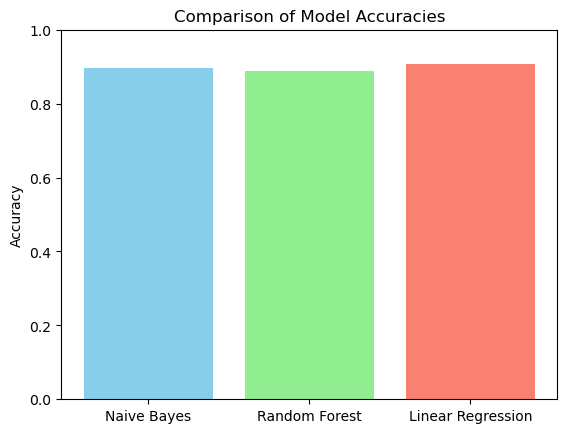

In [96]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Random Forest', 'Linear Regression']
accuracies = [acc_MNB, acc_RF, acc_LR]

plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

plt.show()
